In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
import csv
import pandas as pd
## reference:http://www.albertauyeung.com/post/python-matrix-factorization/hj
DataFrameBase = pd.read_csv('C:/Users/weich/Google Drive/Rice University/3rd Semester/ELEC 578/HW7/ml-100k/u1.base',
                         names=['user id', 'item id', 'rating', 'timestamp'], sep='\t')

DataFrameTest = pd.read_csv('C:/Users/weich/Google Drive/Rice University/3rd Semester/ELEC 578/HW7/ml-100k/u1.test',
                         names=['user id', 'item id', 'rating', 'timestamp'], sep='\t')

In [62]:
num_user = 943
num_item = 1682
X_base = np.zeros((num_user, num_item))
X_test = np.zeros((num_user, num_item))

In [63]:
for i in range(len(DataFrameBase)):
    X_base[DataFrameBase['user id'][i]-1][DataFrameBase['item id'][i]-1] = DataFrameBase['rating'][i]
    
for i in range(len(DataFrameTest)):
    X_test[DataFrameTest['user id'][i]-1][DataFrameTest['item id'][i]-1] = DataFrameTest['rating'][i]

In [6]:
X_base

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [130]:
class MatrixFactor():
    
    def __init__(self, X_train, k, alpha, iterations):
        self.X_train = X_train
        self.num_users, self.num_items = X_train.shape
        self.k = k
        self.alpha = alpha
        self.iterations = iterations

    def train(self):
        self.U = np.random.normal(scale=1./self.k, size=(self.num_users, self.k))
        self.V = np.random.normal(scale=1./self.k, size=(self.num_items, self.k))
        
        self.b_u = np.zeros(self.num_users)
        self.b_t = np.zeros(self.num_items)
        self.b = np.mean(self.X_train[np.where(self.X_train != 0)])

        self.samples = [
            (i, j, self.X_train[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.X_train[i, j] > 0
        ]
        
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.SGM()
            loss = self.loss()
            training_process.append((i, loss))
        
        return training_process

    def loss(self):
        xs, ys = self.X_train.nonzero()
        predicted = self.matrix()
        error = 0
        for x, y in zip(xs, ys):
            if self.X_train[x, y] != 0:
                error += pow(self.X_train[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def SGM(self):
        for i, j, y in self.samples:
            prediction = self.get_rating(i, j)
            l = (y - prediction)
            
            self.b_u[i] += self.alpha * l
            self.b_t[j] += self.alpha * l
            
            self.U[i, :] += self.alpha * l * self.V[j, :]
            self.V[j, :] += self.alpha * l * self.U[i, :]

    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_t[j] + self.U[i, :].dot(self.V[j, :].T)
        return prediction
    
    def matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_t[np.newaxis:,] + mf.U.dot(mf.V.T)

In [147]:
loss_temp = np.zeros(min(num_user, num_item))
for i in range(min(num_user, num_item)):
    mf = MatrixFactor(X_base, k=i+1, alpha=0.01, iterations=20)
    loss = mf.train()
    if i%20==0:
        print('k: ', i+1)
    loss_temp[i] = loss[-1][1]

k:  1
k:  21
k:  41
k:  61
k:  81
k:  101
k:  121
k:  141
k:  161
k:  181
k:  201
k:  221
k:  241
k:  261
k:  281
k:  301
k:  321
k:  341
k:  361
k:  381
k:  401
k:  421
k:  441
k:  461
k:  481
k:  501
k:  521
k:  541
k:  561
k:  581
k:  601
k:  621
k:  641
k:  661
k:  681
k:  701
k:  721
k:  741
k:  761
k:  781
k:  801
k:  821
k:  841
k:  861
k:  881
k:  901
k:  921
k:  941


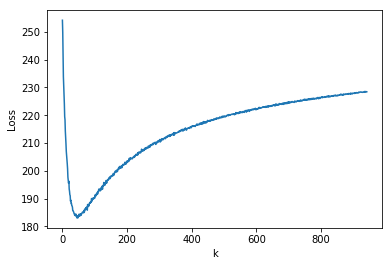

In [148]:
plt.plot(loss_temp)
plt.xlabel("k")
plt.ylabel("Loss")
plt.show()

In [155]:
print('k: ', np.argmin(loss_temp)+1)

k:  46


In [150]:
mf = MatrixFactor(X_base, k=np.argmin(loss_temp)+1, alpha=0.01, iterations=50)
loss = mf.train()

[iteration, loss]:  [25, 154.01673162936905]
[iteration, loss]:  [50, 91.92494033373379]


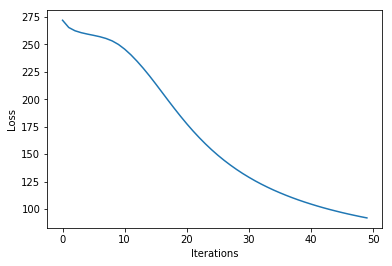

In [151]:
x = [x for x, y in loss]
y = [y for x, y in loss]
plt.plot(x, y)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [152]:
X_predict = mf.matrix()
X_predict[X_test==0] = 0

acc = np.linalg.norm(X_predict - X_test) / (num_user*num_item)
print('prediction accuracy (MSE): ', acc)

prediction accuracy (MSE):  9.797028778546268e-05


In [159]:
# test set training on k=20
mf = MatrixFactor(X_base, k=20, alpha=0.01, iterations=50)
loss = mf.train()

[iteration, loss]:  [25, 181.64863510653004]
[iteration, loss]:  [50, 153.79777389429117]


In [160]:
# test set training on k=50
mf = MatrixFactor(X_base, k=50, alpha=0.01, iterations=50)
loss = mf.train()

[iteration, loss]:  [25, 151.78350894891759]
[iteration, loss]:  [50, 86.70767413942713]


In [156]:
# test set training on k=100
mf = MatrixFactor(X_base, k=100, alpha=0.01, iterations=50)
loss = mf.train()

[iteration, loss]:  [25, 148.81299714853253]
[iteration, loss]:  [50, 48.50950871832002]


In [157]:
# test set training on k=200
mf = MatrixFactor(X_base, k=200, alpha=0.01, iterations=50)
loss = mf.train()

[iteration, loss]:  [25, 158.0019377442411]
[iteration, loss]:  [50, 39.337055889734536]


In [164]:
# test set training on k=210
mf = MatrixFactor(X_base, k=210, alpha=0.01, iterations=50)
loss = mf.train()

[iteration, loss]:  [25, 159.10459421501375]
[iteration, loss]:  [50, 39.33493373929054]


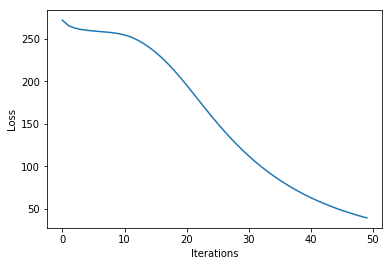

In [165]:
x = [x for x, y in loss]
y = [y for x, y in loss]
plt.plot(x, y)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [166]:
X_predict = mf.matrix()
X_predict[X_test==0] = 0

acc = np.linalg.norm(X_predict - X_test) / (num_user*num_item)
print('prediction accuracy (MSE): ', acc)

prediction accuracy (MSE):  8.726503731261758e-05


In [163]:
# test set training on k=220
mf = MatrixFactor(X_base, k=220, alpha=0.01, iterations=50)
loss = mf.train()

[iteration, loss]:  [25, 159.9410897235963]
[iteration, loss]:  [50, 39.37698362444992]


In [162]:
# test set training on k=250
mf = MatrixFactor(X_base, k=250, alpha=0.01, iterations=50)
loss = mf.train()

[iteration, loss]:  [25, 162.6205223341625]
[iteration, loss]:  [50, 39.47122230960694]


In [161]:
# test set training on k=300
mf = MatrixFactor(X_base, k=300, alpha=0.01, iterations=50)
loss = mf.train()

[iteration, loss]:  [25, 166.0481260008579]
[iteration, loss]:  [50, 39.908420985281055]


In [158]:
# test set training on k=500
mf = MatrixFactor(X_base, k=500, alpha=0.01, iterations=50)
loss = mf.train()

[iteration, loss]:  [25, 177.33400400866373]
[iteration, loss]:  [50, 42.74075671531363]
